## Tiền xử lý dữ liệu tập tin titanic.csv
- Tập dữ liệu Titanic gồm các thông tin về hành khách trên chuyến tàu Titanic. Dữ liệu dùng để dự đoán hành khách sống/chết (biến Survived)
- Đọc tập tin titanic.csv và xem các thông tin cơ bản
### Yêu cầu:
- Xóa biến PassengerId
- <b>Kiểm tra dữ liệu bị trùng</b>
- Xóa các biến không cần thiết: Name, Ticket, Cabin
- <b>Kiểm tra dữ liệu bị thiếu</b>
- Thay thế giá trị thiếu của biến Age bằng Age trung bình
- Xóa các quan sát bị thiếu giá trị trong biến Embarked
- Tạo biến SibSp_Parch là tổng hai biến SibSp và Parch
- Tạo biến Alone: có giá trị là 1 khi biến SibSp_Parch bằng 0 và là 0 khi biến SibSp_Parch >0
- <b>Phát hiện outlier trong biến Age, biến Fare</b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/titanic.csv')

In [3]:
df.shape

(891, 12)

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# Xóa biến PassengerId
df.drop(columns='PassengerId', inplace=True)

In [6]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.duplicated().any()

False

In [8]:
df.duplicated(subset=['Name']).any()

False

In [9]:
# Xóa các biến không cần thiết
df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [10]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [11]:
df.isnull().sum()/df.shape[0]

Survived    0.000000
Pclass      0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Fare        0.000000
Embarked    0.002245
dtype: float64

In [12]:
# Điền giá trị trung bình vào biến Age cho các giá trị thiếu
m = df['Age'].mean()
df['Age'].fillna(m, inplace=True)

In [13]:
# Loại bỏ các quan sát có giá trị thiếu trên biến Embarked
df = df.dropna(subset=['Embarked'])

In [14]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [15]:
# Tạo biến SibSp_Parch là tổng hai biến SibSp và Parch
df['SibSp_Parch'] = df['SibSp'] + df['Parch']
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,SibSp_Parch
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0


In [16]:
# Tạo biến Alone: là 1 khi biến SibSp_Parch bằng 0 và là 0 khi biến SibSp_Parch >0
df['Alone'] = np.where(df['SibSp_Parch']==0, 1, 0)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,SibSp_Parch,Alone
0,0,3,male,22.0,1,0,7.2500,S,1,0
1,1,1,female,38.0,1,0,71.2833,C,1,0
2,1,3,female,26.0,0,0,7.9250,S,0,1
3,1,1,female,35.0,1,0,53.1000,S,1,0
4,0,3,male,35.0,0,0,8.0500,S,0,1


In [17]:
df['Alone'].value_counts()

1    535
0    354
Name: Alone, dtype: int64

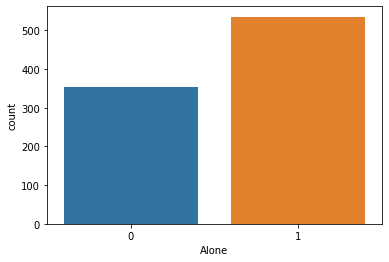

In [18]:
sns.countplot(data=df, x='Alone')
plt.show()

In [19]:
df['Age'].describe()

count    889.000000
mean      29.653446
std       12.968366
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

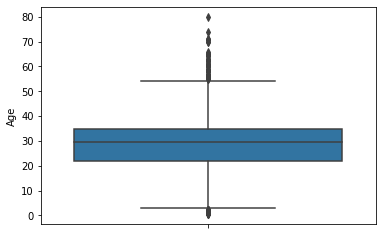

In [20]:
sns.boxplot(data=df, y='Age')
plt.show()

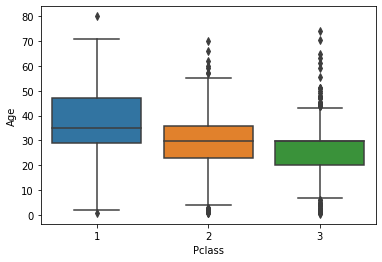

In [21]:
sns.boxplot(data=df, y='Age', x='Pclass')
plt.show()

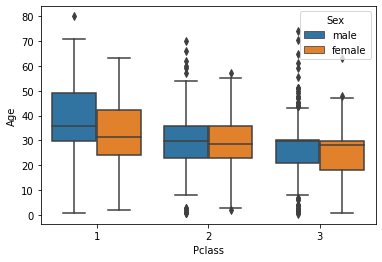

In [25]:
sns.boxplot(data=df, y='Age', x='Pclass', hue='Sex')
plt.show()

In [22]:
df['Fare'].describe()

count    889.000000
mean      32.096681
std       49.697504
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

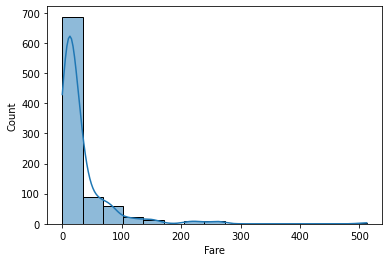

In [23]:
sns.histplot(data=df, x='Fare', bins=15, kde=True)
plt.show()

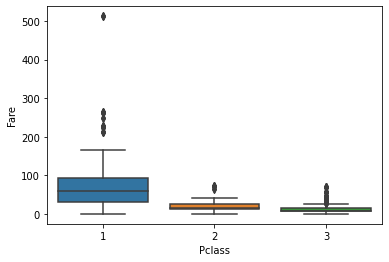

In [24]:
sns.boxplot(data=df, y='Fare', x='Pclass')
plt.show()